In [1]:
# 비지도학습(데이터에 label, target, 종속변수가 없는 경우)에 대해서 알아보아요!
# 가장 대표적인 알고리즘은 K-Means 알고리즘
# 이 K-Means알고리즘은 EM 알고리즘으로 동작해요!
# EM의 E(Expectation)의 의미로 가장 가까운 centroid에 데이터 군집으로 할당.
# EM의 M(Maximization)의 의미로 cluster 경계에 대한 중심점(centroids)를 결정

# cluster의 경계가 변하지 않을때까지 반복해서 처리!
# 그런데 초기 centroids의 선택에 따라 다르게 cluster가 생성될 수 있어요!
# 어떤 경우는 좋고, 어떤 경우는 좋지 않아요!
# 여러번 해요! 그 중 가장 좋은 경우를 결과로 사용해요!

# 간단하게 코드로 표현해 보아요!
# 중심점이 5개인 데이터 100개를 무작위로 생성해서 정삭적으로 cluster가 생성되는지
# 확인해 보면 좋을거 같아요!

# 필요한 module import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.datasets import load_iris
from sklearn.datasets import make_circles
from sklearn.datasets import make_moons
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA

Matplotlib created a temporary cache directory at C:\Users\lee_0\AppData\Local\Temp\matplotlib-th4bxuph because the default path (C:\Users\lee_0\.matplotlib) is not a writable directory; it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.


(100, 2)
(100,)
(array([0, 1, 2, 3]), array([25, 25, 25, 25], dtype=int64))


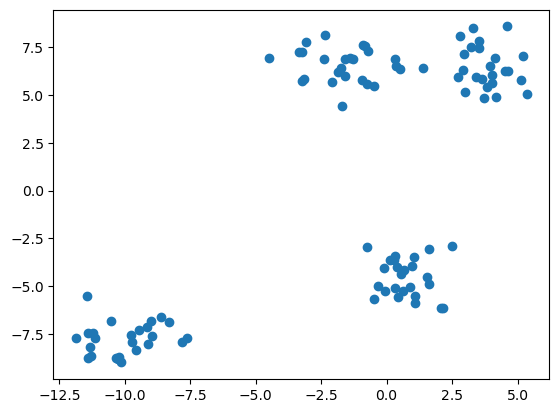

In [2]:
# 중심점이 4개인 100개의 랜덤 데이터를 생성해요!
# n_samples : 전체 데이터 포인트의 수
# centers : 클러스터의 수
# n_features : 각 데이터 포인트의 feature 개수(데이터의 차원)
# random_state : 랜덤값을 생성하기 위한 seed값. (난수의 재현율을 보장하기 위해)
# points : 생성된 데이터의 feature
# labels : 각 데이터 포인트의 소속 클러스터 레이블
points, labels = make_blobs(n_samples=100,
                            centers=4,
                            n_features=2,
                            random_state=100)

print(points.shape)  # (100, 2)
print(labels.shape)  # (100,)
print(np.unique(labels, return_counts=True))  # (array([0, 1, 2, 3]), array([25, 25, 25, 25], dtype=int64))

# 랜덤으로 생성된 데이터를 2차원 평면에 scatter를 이용해서 표현해 보아요!
plt.scatter(points[:, 0], points[:, 1])
plt.show()

In [3]:
# K-Means는 hyperparameter가 k값, cluster의 개수
# n_init : k-means알고리즘을 여러번 실행해 가장 좋은 경우를 선택
#            초기값은 10, 과거에는 이 값을 우리가 설정했는데
#            왠만하면 auto라는 값을 설정하는게 좋아요!
kmeans_cluster = KMeans(n_clusters=4,
                        n_init='auto',
                        random_state=100)

# 모델이 만들어졌으니 이제 학습을 해야 겠죠.
kmeans_cluster.fit(points)

# labels_ : 클러스터값
print(kmeans_cluster.labels_)

[0 3 3 1 1 0 0 2 1 2 1 1 0 2 0 2 3 3 3 2 2 2 2 1 0 3 2 3 2 0 0 0 0 2 3 2 2
 3 1 2 0 3 1 3 2 2 3 3 0 1 0 2 1 3 0 0 2 3 3 2 0 1 2 0 0 1 2 1 2 0 1 3 1 0
 2 3 3 3 1 0 1 1 1 3 0 2 1 1 2 3 1 3 3 0 1 0 1 3 0 1]


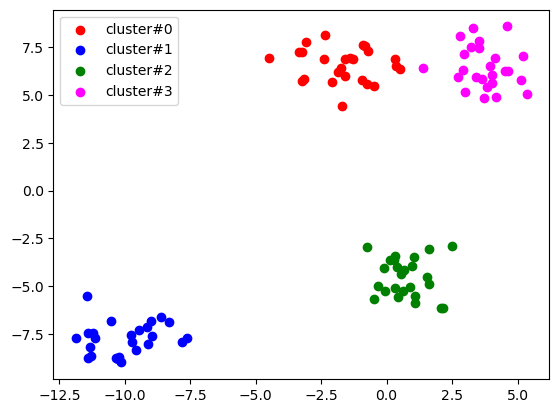

In [4]:
# clustering한 결과를 시각화!

my_color = {0 : 'red', 1 : 'blue', 2 : 'green', 3 : 'magenta'}

# 각 cluster마다 scatter를 반복적으로 그리면 되요!
for n in range(4):
    cluster_sub_points = points[kmeans_cluster.labels_ == n]
    plt.scatter(cluster_sub_points[:, 0],
                cluster_sub_points[:, 1],
                color=my_color[n],
                label=f'cluster#{n}')
plt.legend()
plt.show()

In [5]:
# predict

new_point = np.array([[0.0, 0.0]])

result_cluster = kmeans_cluster.predict(new_point)

print(result_cluster)  # [2]

[2]


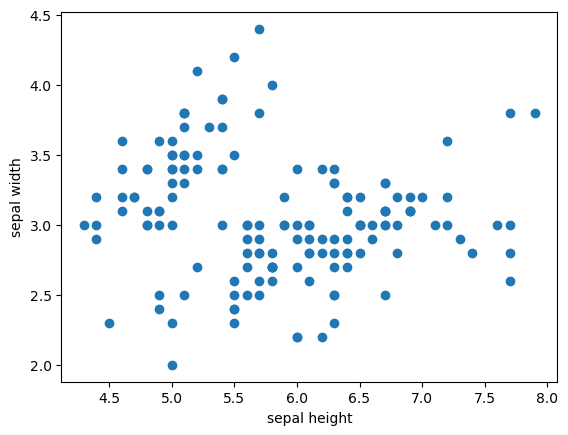

In [6]:
# 랜덤데이터를 이용해서 K-means 알고리즘이 동작하는걸 확인해봤어요!

# 우리가 알고있는 데이터를 한번 이용해 보아요!
# iris(붓꽃데이터)를 이용해서 clustering을 해 보아요!

# iris data는 독립변수가 4개예요.
# 꽃받침길이, 꽃받침의 너비, 꽃잎의 길이와 너비
# 종속변수가 있어요! 3가지 종류가 있어요 => 다중분류예제로 많이 사용

# 독립변수를 4개 사용하면 2차원 평면에 그림을 그릴 수 가 없어요!
# 2차원 평면에 클러스터링이 된 결과를 확인하기 위해
# 꽃받침길이, 꽃받침의 너비 두개의 feature만 사용해 보아요!

iris = load_iris()
# display(iris)

sample = iris.data
# 일단 그래프를 한 번 그려 보아요!
x = sample[:, 0]
y = sample[:, 1]
plt.scatter(x, y)
plt.xlabel('sepal height')
plt.ylabel('sepal width')
plt.show()

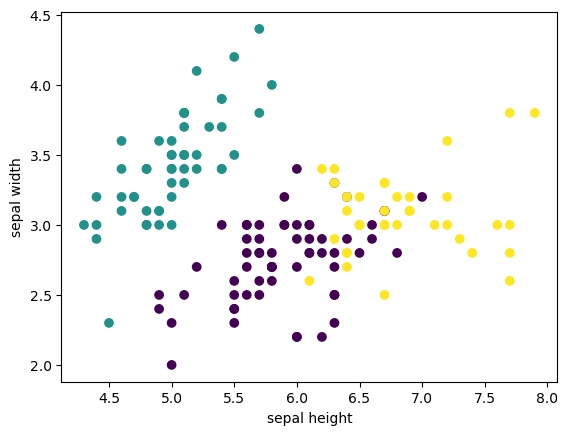

In [7]:
model = KMeans(n_clusters=3,
               n_init='auto')

# 학습을 진행
model.fit(sample)

# predict()를 이용해서 예측을 해 보아요!
labels = model.predict(sample)
# print(labels)

# 일단 그래프를 한번 그려 보아요!
x = sample[:, 0]
y = sample[:, 1]
plt.scatter(x, y, c=labels)
plt.xlabel('sepal height')
plt.ylabel('sepal width')
plt.show()

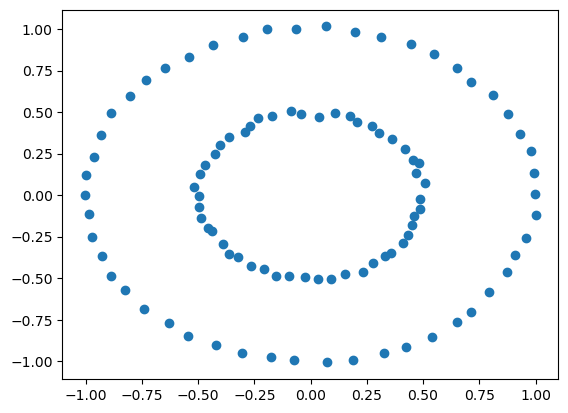

In [8]:
# Iris Data Set으로 clustering이 되는걸 확인해 봤어요!
# 잘 동작하는거 같아요!
# 왠만한 clustering을 위한 학습과 예측은 K-Means알고리즘으로 해결 가능!

# 그런데 문제가 하나 있어요!
# 주어진 데이터의 분포에 따라서 의도치 않은 상황이 발생할 수 있어요!
# 알고리즘의 특성 때문에 그래요!

# 이런 형태(K-Means로 clustering이 잘 되지 않는 경우)는 크게 3가지가 존재해요!

# 1. 데이터가 원형 데이터인 경우에는 KMeans가 정상적으로 동작하지 않아요!
# 예를 들어 보아요!

# 원형으로 되어 있는 데이터를 확보하기 위해 sklearn을 이용

# 이 함수는 두 개의 원으로 이루어진 데이터를 생성해요!
# n_samples : 데이터의 총 개수
# factor : 값이 0에 가까울 수록 두 원의 거리가 멀어져요!
#             값이 1에 가까울 수록 두 원의 거리가 가까워요!
# noise : 데이터에 추가되는 무작위 노이즈의 양
circle_points, circle_labels = make_circles(n_samples=100,
                                            factor=0.5,
                                            noise=0.01)
# print(circle_points.shape)
# print(circle_labels)

plt.scatter(circle_points[:, 0], circle_points[:, 1])
plt.show()

[1 1 0 1 0 1 1 0 1 1 0 1 0 0 1 1 1 1 0 0 1 0 1 1 1 0 0 0 0 0 1 1 1 0 1 1 1
 1 0 1 0 0 0 1 1 0 1 0 0 1 1 0 1 0 0 1 1 1 0 0 0 1 0 0 0 0 1 0 1 0 1 0 1 0
 0 1 1 1 1 1 0 0 1 0 1 1 0 1 0 0 1 0 1 0 0 0 0 1 1 1]


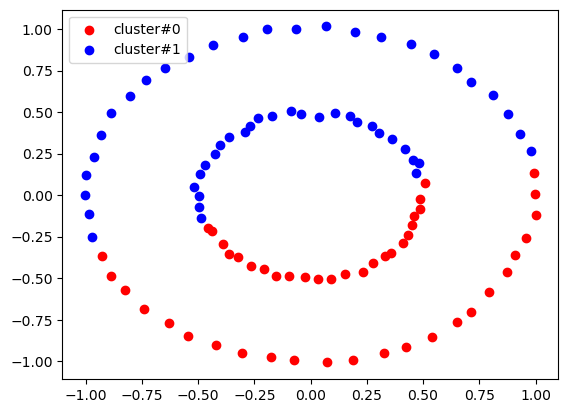

In [9]:
circle_model = KMeans(n_clusters=2,
                      n_init='auto')

circle_model.fit(circle_points)
print(circle_model.labels_)

my_color = {0 : 'red', 1 : 'blue'}
# 각 cluster마다 scatter를 반복적으로 그리면 되요!
for n in range(2):
    cluster_sub_points = circle_points[circle_model.labels_ == n]
    plt.scatter(cluster_sub_points[:, 0],
                cluster_sub_points[:, 1],
                color=my_color[n],
                label=f'cluster#{n}')
plt.legend()
plt.show()

In [10]:
# 결과를 확인했더니. . . 원형데이터 분포는 K-Means알고리즘이 잘 동작하지 않아요!
# 클러스터를 정상적으로 나누지 않는거 같아요!

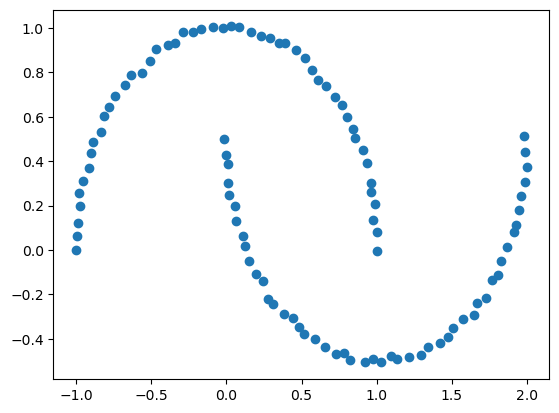

In [11]:
# 또 다른 경우를 알아보죠. 두 번째예요!
moon_points, moon_labels = make_moons(n_samples=100,
                                      noise=0.01)

plt.scatter(moon_points[:, 0], moon_points[:, 1])
plt.show()

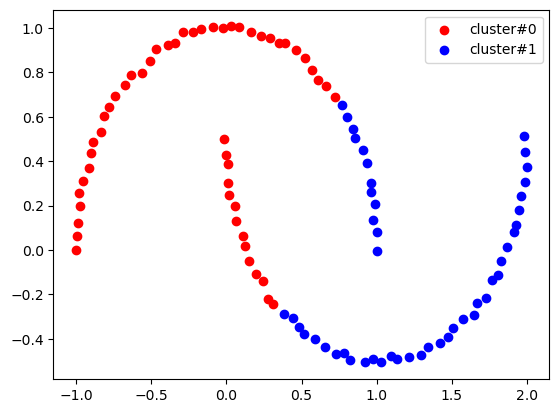

In [12]:
moon_model = KMeans(n_clusters=2,
                    n_init='auto')

moon_model.fit(moon_points)

my_color = {0 : 'red', 1 : 'blue'}
# 각 cluster마다 scatter를 반복적으로 그리면 되요!
for n in range(2):
    cluster_sub_points = moon_points[moon_model.labels_ == n]
    plt.scatter(cluster_sub_points[:, 0],
                cluster_sub_points[:, 1],
                color=my_color[n],
                label=f'cluster#{n}')
plt.legend()
plt.show()

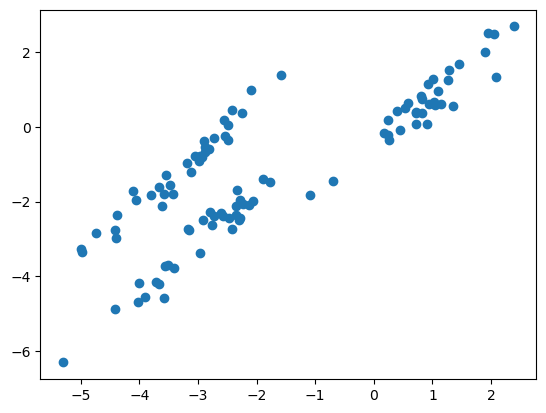

In [13]:
# 세 번째 데이터 분포예요!
# 대각선 모양의 데이터에 대해 클러스터링이 잘 되지 않아요!

diag_points, _ = make_blobs(n_samples=100,
                            random_state=170)

# 대각행렬을 이용해서 데이터를 대각선 분포로 형성
transformation = [[0.6, 0.6],
                  [-0.4, -0.8]]

diag_points = np.dot(diag_points, transformation)

plt.scatter(diag_points[:, 0], diag_points[:, 1])
plt.show()

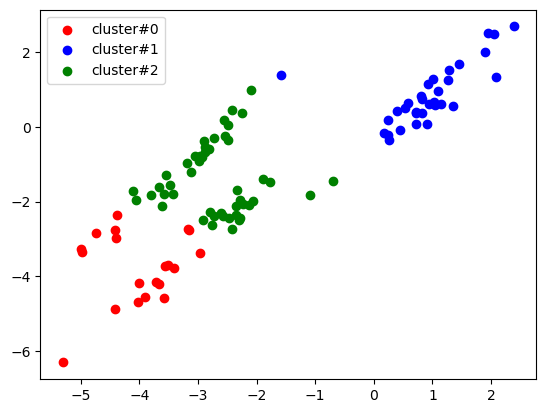

In [14]:
diag_model = KMeans(n_clusters=3,
                      n_init='auto')

diag_model.fit(diag_points)

my_color = {0 : 'red', 1 : 'blue', 2 : 'green'}
# 각 cluster마다 scatter를 반복적으로 그리면 되요!
for n in range(3):
    cluster_sub_points = diag_points[diag_model.labels_ == n]
    plt.scatter(cluster_sub_points[:, 0],
                cluster_sub_points[:, 1],
                color=my_color[n],
                label=f'cluster#{n}')
plt.legend()
plt.show()

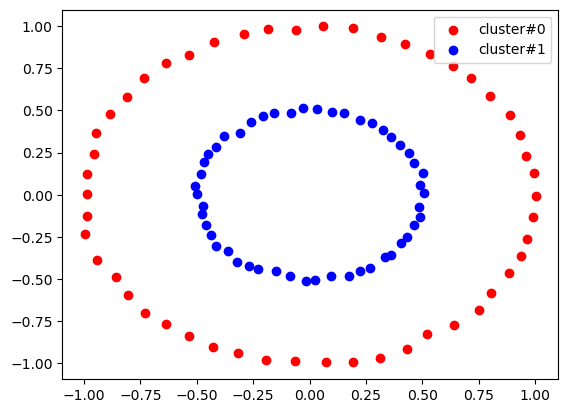

In [15]:
# DBSCAN을 이용해서 KMeans로 clustering하지 못한 경우를 해결해 보아요!

# 이함수는 두개의 원으로 이루어진 데이터를 생성해요!
circle_points, circles_labels = make_circles(n_samples=100,
                                             factor=0.5,
                                             noise=0.01)

epsilon = 0.2
minPts = 3

circle_model = DBSCAN(eps=epsilon,
                      min_samples=minPts)

circle_model.fit(circle_points)

# cluster의 수는 몇개가 나오나요?
# print(max(circle_model.labels_) + 1)

my_color = {0 : 'red', 1 : 'blue'}
# 각 cluster마다 scatter를 반복적으로 그리면 되요!
for n in range(2):
    cluster_sub_points = circle_points[circle_model.labels_ == n]
    plt.scatter(cluster_sub_points[:, 0],
                cluster_sub_points[:, 1],
                color=my_color[n],
                label=f'cluster#{n}')
plt.legend()
plt.show()

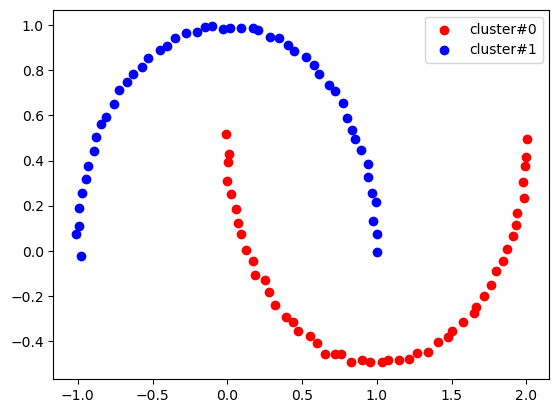

In [16]:
# 달 모양과 대각선으로 길게 이어진 데이터에 대해서
# 우리가 원하는 대로 clustering을 DBSCAN으로 할 수 있는지 확인을 해 보세요!

# 달 모양
moon_points, moon_labels = make_moons(n_samples=100,
                                                                noise=0.01)

epsilon = 0.2
minPts = 3

moon_model = DBSCAN(eps=epsilon,
                      min_samples=minPts)

moon_model.fit(moon_points)

# cluster의 수는 몇개가 나오나요?
# print(max(moon_model.labels_) + 1)

my_color = {0 : 'red', 1 : 'blue'}
# 각 cluster마다 scatter를 반복적으로 그리면 되요!
for n in range(2):
    cluster_sub_points = moon_points[moon_model.labels_ == n]
    plt.scatter(cluster_sub_points[:, 0],
                cluster_sub_points[:, 1],
                color=my_color[n],
                label=f'cluster#{n}')
plt.legend()
plt.show()

3


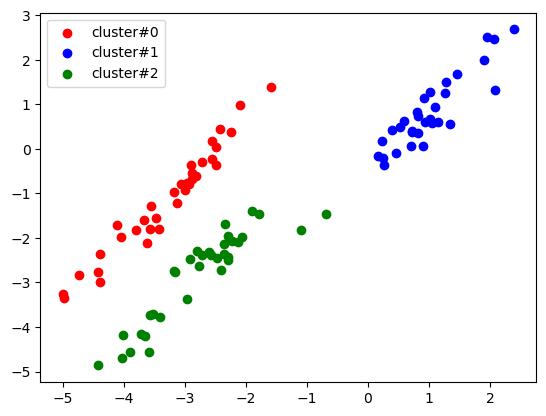

In [17]:
# 대각선
diag_points, _ = make_blobs(n_samples=100,
                            random_state=170)

# 대각행렬을 이용해서 데이터를 대각선 분포로 변형
transformation = [[0.6, 0.6],
                  [-0.4, -0.8]]

diag_points = np.dot(diag_points,transformation)

epsilon = 0.77
minPts = 3

diag_model = DBSCAN(eps=epsilon,
                      min_samples=minPts)

diag_model.fit(diag_points)

# cluster의 수는 몇개가 나오나요?
print(max(diag_model.labels_) + 1)

my_color = {0 : 'red', 1 : 'blue', 2 : 'green'}
# 각 cluster마다 scatter를 반복적으로 그리면 되요!
for n in range(3):
    cluster_sub_points = diag_points[diag_model.labels_ == n]
    plt.scatter(cluster_sub_points[:, 0],
                cluster_sub_points[:, 1],
                color=my_color[n],
                label=f'cluster#{n}')
plt.legend()
plt.show()

In [18]:
# 차원축소 기법 중 주성분분석(PCA)에 대해서 알아보아요

# 사용할 예제는 iris예요!
# 아시다시피. . . iris는 3가지 품종이 있어요!
# 각 품종을 결정짓는 요소는 4가지가 있어요!
# 꽃받침(sepal)의 길이와 너비, 꽃잎(petal)의 길이와 너비

# 이 데이터를 차원축소예제로 드는 이유는. . .
# 독립변수에 대해 상관관계분석을 해 보면 상관계수가 높은 feature가 존재!
# 이런 경우 차원축소를 이용하면 훨씬 더 좋은 효과를 얻을 수 있어요!

# Raw Data Loading
data = load_iris()

iris_df = pd.DataFrame(iris.data,
                       columns=['sepal_length', 'sepal_width',
                                'petal_length', 'petal_width'])
# display(iris_df)  # 150 rows × 4 columns

# 상관관계분석
iris_df.corr()
# feature간의 연관성이 깊어요!

# 따라서 주성분분석(PCA)를 통해 차원을 축소해서 사용하면
# 약간의 데이터 로스가 발생하겠지만 모델의 복잡도가 줄고
# overfitting도 줄어들어서 더 좋은 모델이 만들어 질 수도 있어요!

# 주성분을 몇개로 하면 좋을까요?
# 이 개수를 구하기 위해 주성분의 분산을 계산해서 사용해요!

pca = PCA(random_state=1004)  # 주성분의 개수를 안 줬어요!
                                               # 차원을 축소하지는 않아요!

pca.fit_transform(iris_df)

pca.explained_variance_ratio_  # 주성분의 분산비율을 알려줘요!
# array([0.92461872, 0.05306648, 0.01710261, 0.00521218])

array([0.92461872, 0.05306648, 0.01710261, 0.00521218])

In [19]:
# 원래 iris데이터는 4개의 feature로 되어 있고 종속변수를 가지고 있어요. (붓꽃의 품종)
# 이전에 우리 다중분류할 때 이 예제를 이용했었는데 다시 한번 실행해서
# 원래 데이터로 다중분류했을 때의 모델의 정확도를 산출
# 여러분들이 구현할 꺼예요!

# 4개의 독립변수를 차원축소해서 2개의 주성분으로 줄여요!
# 이렇게 데이터를 변환한 다음 다중분류 모델을 만들어서
# 학습하고 정확도를 산출할꺼예요!

# 필요한 module import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Raw Data Loading
iris = load_iris()

x_data = iris.data
t_data = iris.target

# 결측치와 이상치는 처리하지 않아요!
# 정규화 진행
scaler = StandardScaler()
scaler.fit(x_data)
x_data_norm = scaler.transform(x_data)

# PCA를 사용해서 차원축소부터 해 보아요!
n_components = 2  # 주성분을 2개로 해요!
pca = PCA(n_components=n_components)
x_data_norm_pca = pca.fit_transform(x_data_norm)
# print(x_data_norm_pca)  # PCA(n_components=2)

x_data_train_norm_pca, x_data_test_norm_pca, t_data_train, t_data_test = \
train_test_split(x_data_norm_pca,
                 t_data,
                 test_size=0.3,
                 stratify=t_data)
# random_state에 따른 값이 다르다.

# 다중분류를 위한 모델을 만들어요!
sklearn_model = LogisticRegression()
sklearn_model.fit(x_data_train_norm_pca,
                  t_data_train)

# Evaluation하기 위해서 모델의 예측치를 알아내요!
predict = sklearn_model.predict(x_data_test_norm_pca)

accuracy = accuracy_score(t_data_test, predict)
print(accuracy)

0.8888888888888888


In [ ]:
# 원래 데이터를 가지고 모델을 만들어서 똑같이 정확도를
# 계산해서 위에서 나온 결과와 비교해 보세요!